In [1]:
print('Seventeenth')

Seventeenth


In [2]:
# 베이스 - 디지털 신호 처리
# CNN - FIR 필터(음성분석)
# RNNN, LTSM = IIR 필터(음성분석)
# 피드백(IIR)을 준다는 개념은 특정값을 찾아 수렴시키는 것이라고 보면 된다.
# 마이크로 펀딩 => FPGA

In [3]:
# y(u, x) => 

In [4]:
!ls ./Applied-Deep-Learning-with-Keras/Lesson09/AAPL_train.csv

./Applied-Deep-Learning-with-Keras/Lesson09/AAPL_train.csv


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
trainSet = pd.read_csv(
    'Applied-Deep-Learning-with-Keras/Lesson09/AAPL_train.csv'
)

trainSet.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2014,79.382858,79.575714,78.860001,79.018570,66.964325,58671200
1,03-01-2014,78.980003,79.099998,77.204285,77.282860,65.493416,98116900
2,06-01-2014,76.778572,78.114288,76.228569,77.704285,65.850533,103152700
3,07-01-2014,77.760002,77.994286,76.845711,77.148575,65.379593,79302300
4,08-01-2014,76.972855,77.937141,76.955711,77.637146,65.793633,64632400


In [7]:
trainSetOpen = trainSet.iloc[:, 1:2].values
trainSetOpen

array([[ 79.382858],
       [ 78.980003],
       [ 76.778572],
       ...,
       [155.839996],
       [157.5     ],
       [158.529999]])

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
sc = MinMaxScaler(feature_range=(0,1))
trainSetScaled = sc.fit_transform(trainSetOpen)
trainSetScaled

array([[0.05400437],
       [0.05148716],
       [0.03773165],
       ...,
       [0.53174205],
       [0.54211448],
       [0.54855037]])

In [10]:
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(trainSetScaled[i - 60: i, 0])
    y_train.append(trainSetScaled[i, 0])
    
X_train = np.array(X_train)
y_train = np.array(y_train)

In [11]:
X_train = np.reshape(
    X_train, (X_train.shape[0], X_train.shape[1],1)
)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.
/home/bitai/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/bitai/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/bitai/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/bitai/anaconda3/lib/python3.7/site-packages/tensorflo

In [13]:
model = Sequential()

model.add(
    LSTM(50, return_sequences = True,
              input_shape = (X_train.shape[1], 1)
        )
)
model.add(
    LSTM(50, return_sequences = True)
)
model.add(
    LSTM(50, return_sequences = True
        )
)
model.add(LSTM(50))
model.add(Dense(1))

In [23]:
model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error'
)

model.fit(
    X_train, y_train, epochs = 100, batch_size = 32
)

Epoch 1/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0025
Epoch 2/100
1198/1198 [==============================] - 3s 2ms/step - loss: 8.6945e-04
Epoch 3/100
1198/1198 [==============================] - 3s 2ms/step - loss: 8.8951e-04
Epoch 4/100
1198/1198 [==============================] - 3s 2ms/step - loss: 9.6044e-04
Epoch 5/100
1198/1198 [==============================] - 3s 2ms/step - loss: 8.4039e-04
Epoch 6/100
1198/1198 [==============================] - 3s 2ms/step - loss: 7.8073e-04
Epoch 7/100
1198/1198 [==============================] - 3s 2ms/step - loss: 7.9554e-04
Epoch 8/100
1198/1198 [==============================] - 3s 2ms/step - loss: 9.0046e-04
Epoch 9/100
1198/1198 [==============================] - 3s 2ms/step - loss: 6.9190e-04
Epoch 10/100
1198/1198 [==============================] - 3s 2ms/step - loss: 6.2401e-04
Epoch 11/100
1198/1198 [==============================] - 3s 2ms/step - loss: 6.9792e-04
Epoch 12/100
1198/1198 [==========

1198/1198 [==============================] - 3s 2ms/step - loss: 2.4698e-04
Epoch 94/100
1198/1198 [==============================] - 3s 2ms/step - loss: 2.4616e-04
Epoch 95/100
1198/1198 [==============================] - 3s 2ms/step - loss: 2.3199e-04
Epoch 96/100
1198/1198 [==============================] - 3s 2ms/step - loss: 2.4244e-04
Epoch 97/100
1198/1198 [==============================] - 3s 2ms/step - loss: 2.2469e-04
Epoch 98/100
1198/1198 [==============================] - 3s 2ms/step - loss: 3.0315e-04
Epoch 99/100
1198/1198 [==============================] - 3s 2ms/step - loss: 2.2396e-04
Epoch 100/100
1198/1198 [==============================] - 3s 2ms/step - loss: 2.4602e-04


In [24]:
testSet = pd.read_csv(
    'Applied-Deep-Learning-with-Keras/Lesson09/AAPL_test.csv'
)

testSet.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2019,154.889999,158.850006,154.229996,157.919998,157.245605,37039700
1,03-01-2019,143.979996,145.720001,142.000000,142.190002,141.582779,91244100
2,04-01-2019,144.529999,148.550003,143.800003,148.259995,147.626846,58607100
3,07-01-2019,148.699997,148.830002,145.899994,147.929993,147.298264,54777800
4,08-01-2019,149.559998,151.820007,148.520004,150.750000,150.106216,41025300


In [25]:
actualStock = testSet.iloc[:, 1:2].values
actualStock

array([[154.889999],
       [143.979996],
       [144.529999],
       [148.699997],
       [149.559998],
       [151.289993],
       [152.5     ],
       [152.880005],
       [150.850006],
       [150.270004],
       [153.080002],
       [154.199997],
       [157.5     ],
       [156.410004],
       [154.149994],
       [154.110001],
       [155.479996],
       [155.789993],
       [156.25    ],
       [163.25    ],
       [166.110001]])

In [26]:
trainSet.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2014,79.382858,79.575714,78.860001,79.018570,66.964325,58671200
1,03-01-2014,78.980003,79.099998,77.204285,77.282860,65.493416,98116900
2,06-01-2014,76.778572,78.114288,76.228569,77.704285,65.850533,103152700
3,07-01-2014,77.760002,77.994286,76.845711,77.148575,65.379593,79302300
4,08-01-2014,76.972855,77.937141,76.955711,77.637146,65.793633,64632400


In [27]:
total = pd.concat(
    (trainSet['Open'], testSet['Open']),
    axis=0
)

In [28]:
inputs = total[len(total) - len(testSet)-60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 81):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
                    

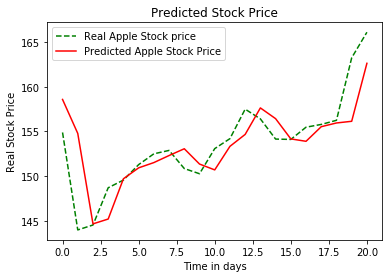

In [29]:
plt.plot(
    actualStock, 
    color='green', 
    label='Real Apple Stock price',
    ls = '--'
)

plt.plot(
    predicted_stock_price, 
    color='red', 
    label='Predicted Apple Stock Price', 
    ls='-'
)
plt.title('Predicted Stock Price')
plt.xlabel('Time in days')
plt.ylabel('Real Stock Price')
plt.legend()
plt.show()
# IIR 필터의 특성이 나타나고 있음

In [30]:
model = Sequential()

model.add(
    LSTM(50, return_sequences = True,
              input_shape = (X_train.shape[1], 1)
        )
)
model.add(
    LSTM(50, return_sequences = True)
)
model.add(
    LSTM(50, return_sequences = True
        )
)
model.add(LSTM(100))
model.add(Dense(1))

model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error'
)

model.fit(
    X_train, y_train, epochs = 100, batch_size = 32
)

Epoch 1/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0330
Epoch 2/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0028
Epoch 3/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0021
Epoch 4/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0020
Epoch 5/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0018
Epoch 6/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0015
Epoch 7/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0014
Epoch 8/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0013
Epoch 9/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0014
Epoch 10/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0014
Epoch 11/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0011
Epoch 12/100
1198/1198 [==============================] - 3s 2ms/step - lo

1198/1198 [==============================] - 3s 2ms/step - loss: 2.6153e-04
Epoch 94/100
1198/1198 [==============================] - 3s 2ms/step - loss: 2.6617e-04
Epoch 95/100
1198/1198 [==============================] - 3s 2ms/step - loss: 2.5725e-04
Epoch 96/100
1198/1198 [==============================] - 3s 2ms/step - loss: 3.0652e-04
Epoch 97/100
1198/1198 [==============================] - 3s 2ms/step - loss: 2.8577e-04
Epoch 98/100
1198/1198 [==============================] - 3s 2ms/step - loss: 3.1597e-04
Epoch 99/100
1198/1198 [==============================] - 3s 2ms/step - loss: 2.7962e-04
Epoch 100/100
1198/1198 [==============================] - 3s 2ms/step - loss: 2.5380e-04


In [31]:
inputs = total[len(total) - len(testSet)-60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 81):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
                    

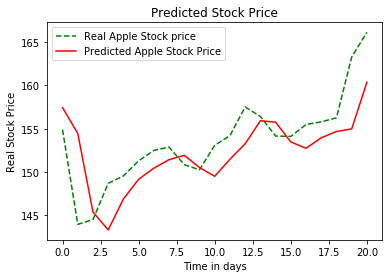

In [32]:
plt.plot(
    actualStock, 
    color='green', 
    label='Real Apple Stock price',
    ls = '--'
)

plt.plot(
    predicted_stock_price, 
    color='red', 
    label='Predicted Apple Stock Price', 
    ls='-'
)
plt.title('Predicted Stock Price')
plt.xlabel('Time in days')
plt.ylabel('Real Stock Price')
plt.legend()
plt.show()
# IIR 필터의 특성이 나타나고 있음

In [37]:
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image

import numpy as np

In [38]:
def prepare_img(img, target):
    img = img.resize(target)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = imagent_utils.preprocessing_input(img)
    
    return img

In [39]:
resModel = None

def load_model():
    global resModel
    resModel = ResNet50()
    

In [40]:
import keras.backend.tensorflow_backend as tb
import tensorflow as tf

global graph, model
graph = tf.get_default_graph()

print(tf.__version__)

1.14.0


In [41]:
from flask import Flask, request, jsonify
from werkzeug.utils import secure_filename

In [ ]:

app = Flask(__name__)

@app.route('/imgServer', methods = ['GET', 'POST'])
def analysis_img():
    data = {"success": False}
    if request.method == 'POST':
        print('POST')
        file = request.files['file']
        file = secure_filename(file.filename)
        print(file)
        
        sea_img = image.load_img(
            file, target_size = (224, 224)
        )
        
        trans_img = image.img_to_array(sea_img)
        trans_img = np.expand_dims(trans_img, axis = 0)
        trans_img = preprocess_input(trans_img)
        print(trans_img.shape)
        
        # session 열고 연산 후, 자동으로 session 닫아줌
        with graph.as_default():
            pred = resModel.predict(trans_img)
            
        label = decode_predictions(pred)
        data["predictions"] = []
        
        for (imageNetID, label, prob) in label[0]:
            r = {
                "label": label, 
                "probability": float(prob)
            }
            data["predictions"].append(r)
            
        data["success"] = True
        
    return jsonify(data)

if __name__ == "__main__":
    load_model()
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [20/Jul/2020 15:21:41] "GET /dataServer HTTP/1.1" 404 -
127.0.0.1 - - [20/Jul/2020 15:22:04] "GET /dataServer HTTP/1.1" 404 -
127.0.0.1 - - [20/Jul/2020 15:22:06] "GET /dataServer HTTP/1.1" 404 -
127.0.0.1 - - [20/Jul/2020 15:22:06] "GET /dataServer HTTP/1.1" 404 -
127.0.0.1 - - [20/Jul/2020 15:22:19] "GET /dataServer HTTP/1.1" 404 -
127.0.0.1 - - [20/Jul/2020 15:24:26] "GET /dataServer HTTP/1.1" 404 -


POST
test_image_2.jpg
(1, 224, 224, 3)


127.0.0.1 - - [20/Jul/2020 15:24:53] "POST /imgServer HTTP/1.1" 200 -
